In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
import seaborn as sns

In [2]:
# 1-1 loading the data file
bankDf = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

# 1-2 shows first 5 rows/records
bankDf.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
# 1-3 shows data types and fields
bankDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [4]:
# 1-4 shows data dimensions (5000 rows and 14 columns)
bankDf.shape

(5000, 14)

In [5]:
# 1-5 checking null values, seems like No null values
bankDf.isnull().values.any()

False

In [6]:
# 2-1 number of unique values in each column
bankDf.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [7]:
# 2-2 Number of people with zero mortgage
bankDf[bankDf.Mortgage == 0].shape[0]

3462

In [8]:
# 2-3 Number of people with zero credit card spending per month
bankDf[bankDf.CCAvg == 0].shape[0]

106

In [9]:
# 2-4 Value counts of all categorical columns
# Categorical Columns: Education, Personal Loan, Securities Account, CD Account, Online, CreditCard
bankDf["Education"].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [10]:
bankDf["Personal Loan"].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [11]:
bankDf["Securities Account"].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [12]:
bankDf["CD Account"].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [13]:
bankDf["Online"].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [14]:
bankDf["CreditCard"].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [15]:
# Family size can be considered as categorical, but doesn't need to be, 
# since in reality the size could be any number, but in our data it looks categorical
bankDf["Family"].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [16]:
df = bankDf.drop('ID',axis=1)
columns = list(df)
columns

['Age',
 'Experience',
 'Income',
 'ZIP Code',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'Personal Loan',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard']

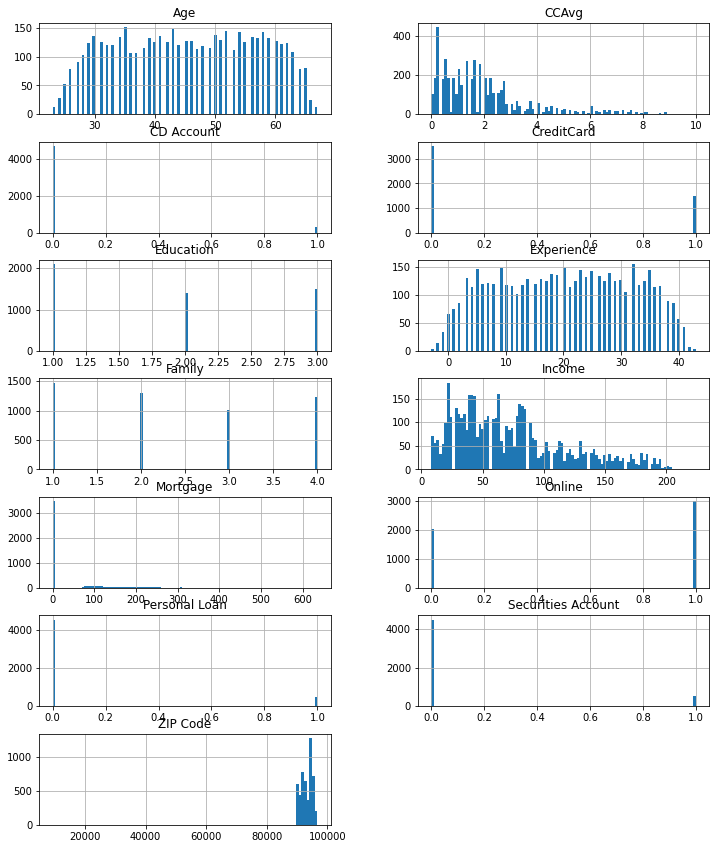

In [17]:
# 2-5 Univariate Plots
df[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 

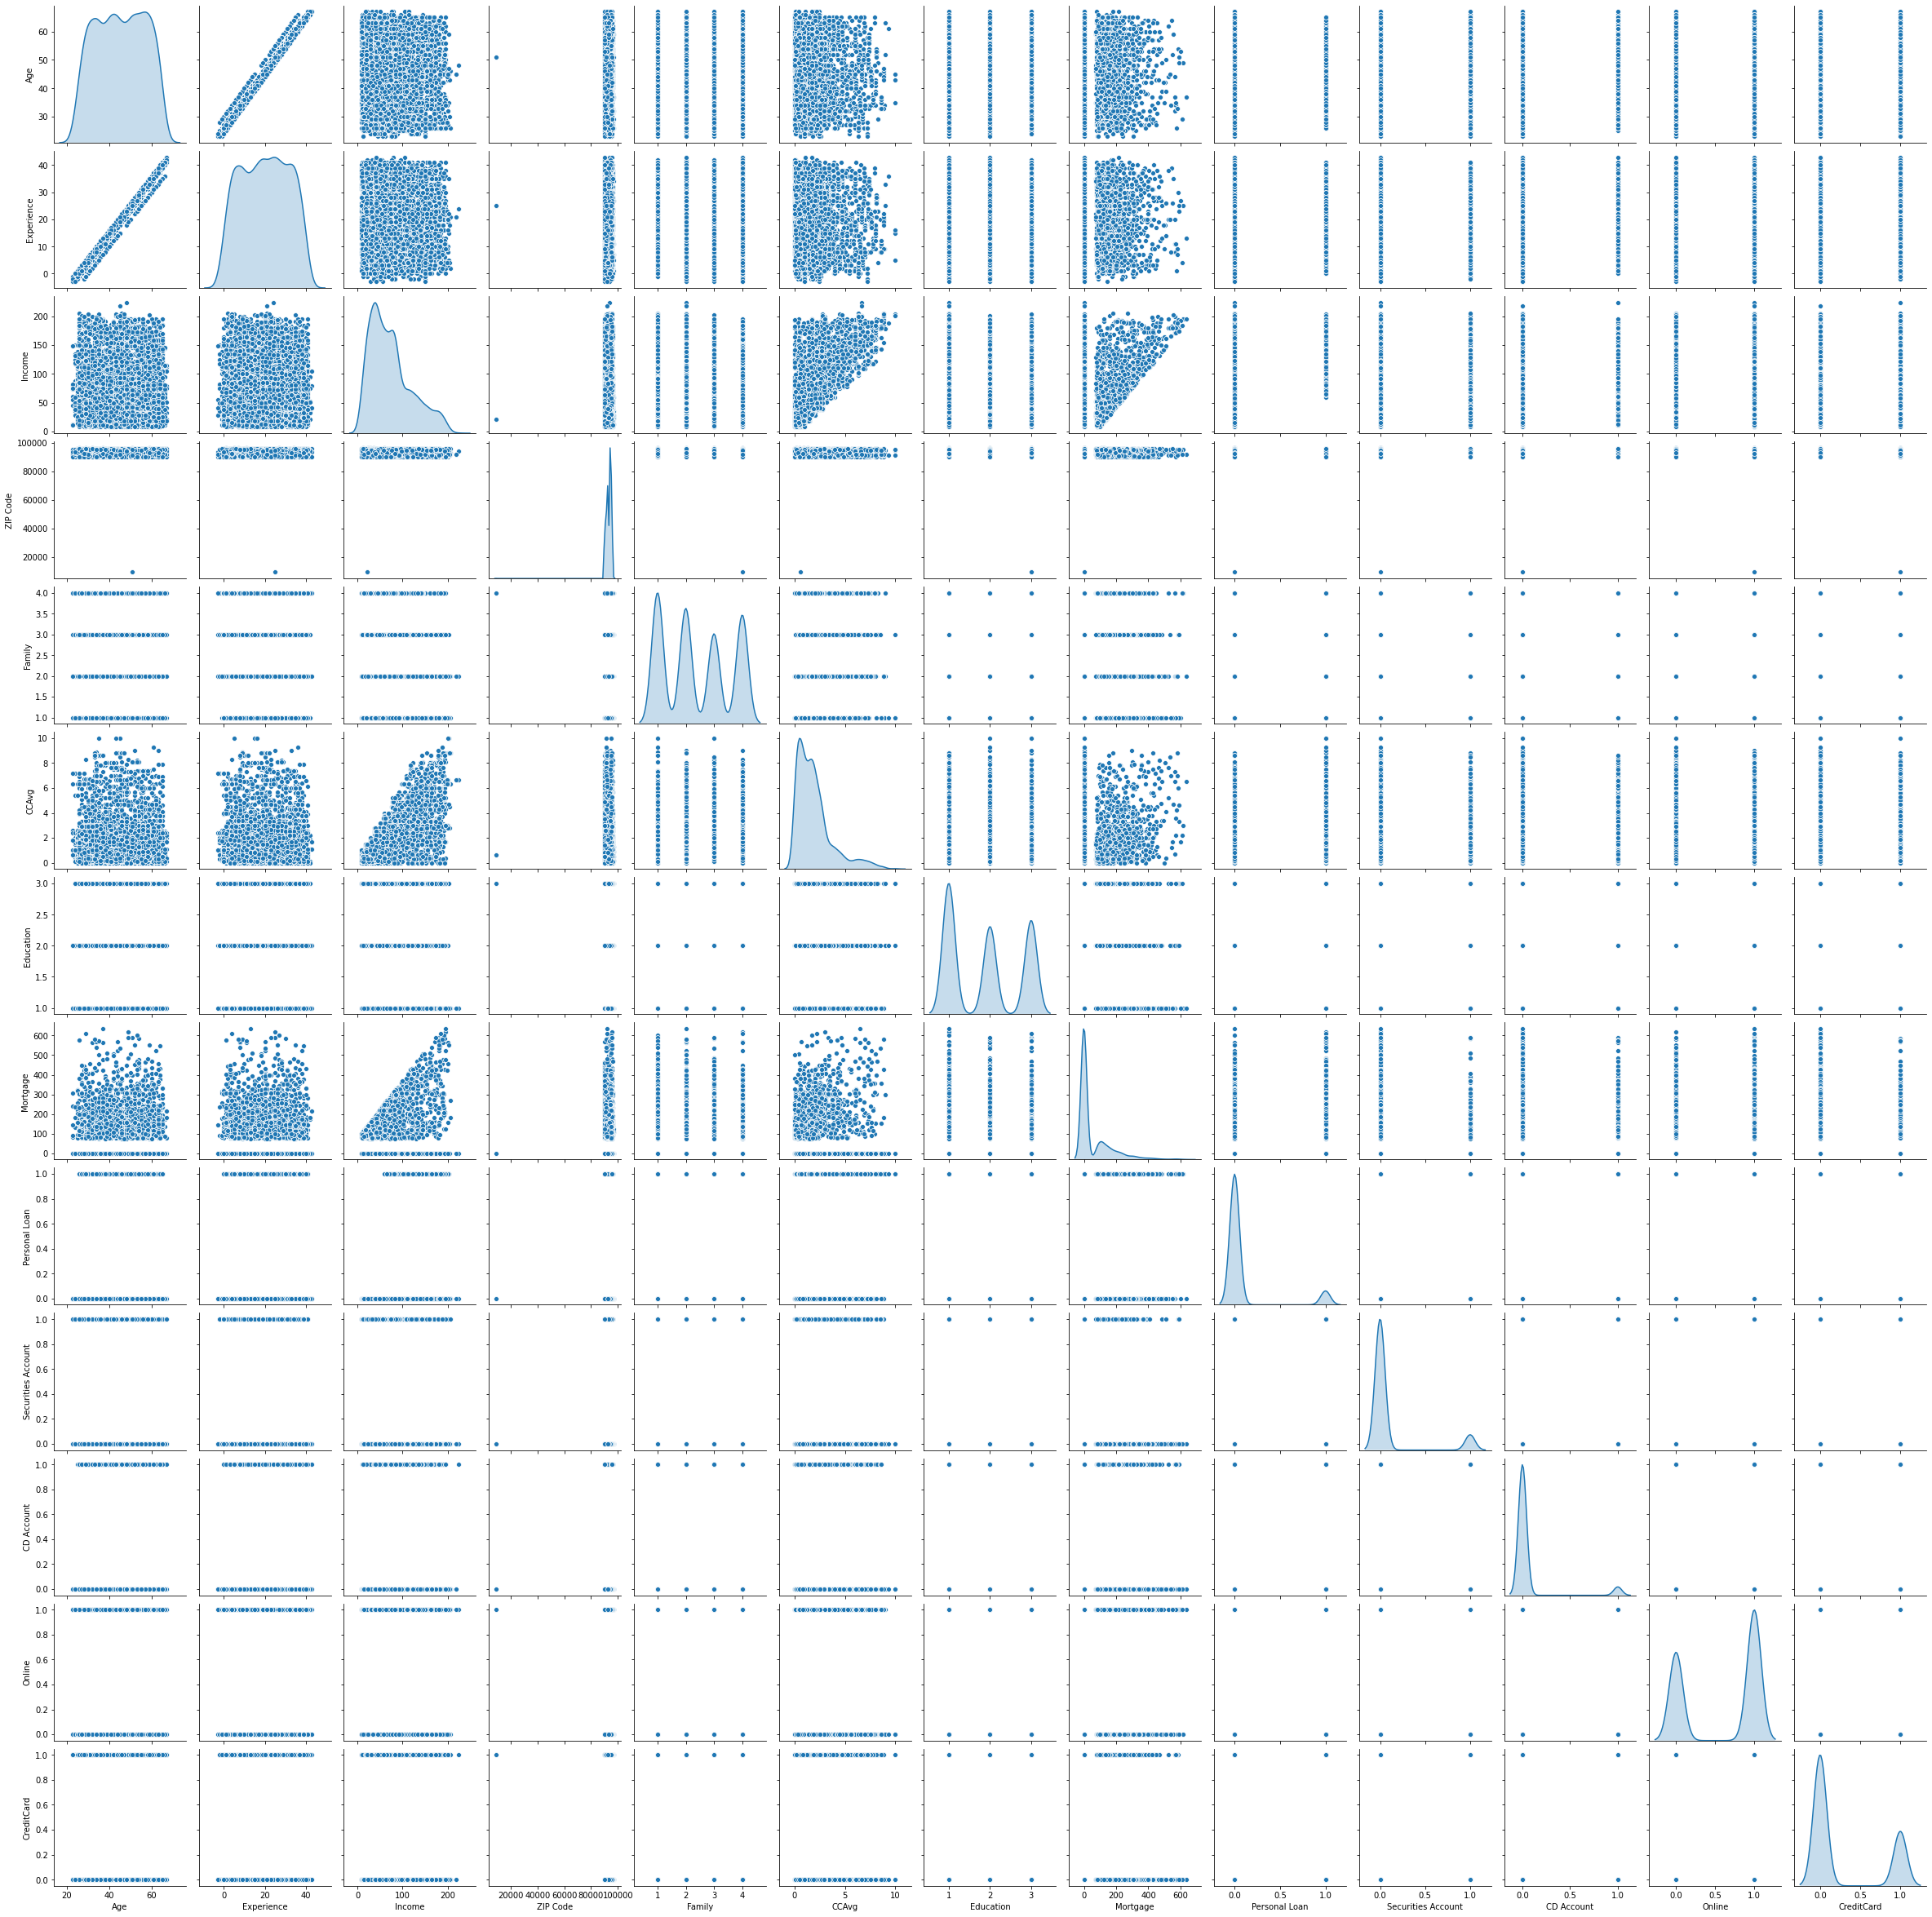

In [18]:
# 2-5 Bivariate
sns.pairplot(df, diag_kind='kde')

In [19]:
bankDf[bankDf.Experience < 0].head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0


In [20]:
# 2-6 Preparing the model; replace negative values in Experience with Zeroes
bankDf.Experience=bankDf.Experience.mask(bankDf.Experience.lt(0),0)

bankDf[bankDf.Experience < 0].head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [101]:
# 3- Split the data into training and test set in the ratio of 70:30 respectively 
from sklearn.model_selection import train_test_split

X = bankDf.drop(['ID', 'Personal Loan'],axis=1)     # Predictor feature columns (8 X m)
Y = bankDf['Personal Loan']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1334,47,22,35,94304,2,1.3,1,0,0,0,1,0
4768,38,14,39,93118,1,2.0,2,0,0,0,1,0
65,59,35,131,91360,1,3.8,1,0,0,0,1,1
177,29,3,65,94132,4,1.8,2,244,0,0,0,0
4489,39,13,21,95518,3,0.2,2,0,0,0,1,0


In [102]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(bankDf.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(bankDf.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [103]:
print("Original Loan True Values    : {0} ({1:0.2f}%)".format(len(bankDf.loc[bankDf['Personal Loan'] == 1]), (len(bankDf.loc[bankDf['Personal Loan'] == 1])/len(bankDf.index)) * 100))
print("Original Loan False Values   : {0} ({1:0.2f}%)".format(len(bankDf.loc[bankDf['Personal Loan'] == 0]), (len(bankDf.loc[bankDf['Personal Loan'] == 0])/len(bankDf.index)) * 100))
print("")
print("Training Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Loan True Values    : 480 (9.60%)
Original Loan False Values   : 4520 (90.40%)

Training Loan True Values    : 331 (9.46%)
Training Loan False Values   : 3169 (90.54%)

Test Loan True Values        : 149 (9.93%)
Test Loan False Values       : 1351 (90.07%)



In [104]:
# 4- Use Logistic Regression model to predict whether the customer will take personal loan or not. 
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df) 

          0         1         2         3         4         5         6  \
0 -0.000482 -0.002279  0.036087 -0.000066  0.015154  0.009447  0.016434   

          7         8         9        10        11  intercept  
0  0.000833  0.000534  0.004678 -0.000177 -0.000067  -0.000105  


In [105]:
model_score = model.score(x_test, y_test)
print(model_score)

0.9073333333333333


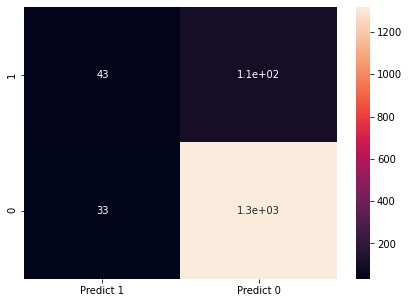

In [106]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [107]:
# The confusion matrix

# True Positives (TP): we correctly predicted that they do have diabetes 43

# True Negatives (TN): we correctly predicted that they don't have diabetes 133

# False Positives (FP): we incorrectly predicted that they do have diabetes (a "Type I error") 112 Falsely predict positive Type I error

# False Negatives (FN): we incorrectly predicted that they don't have diabetes (a "Type II error") 33 Falsely predict negative Type II error

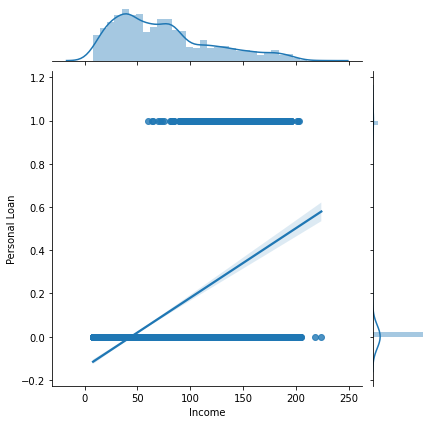

In [108]:
sns.jointplot("Income", "Personal Loan", data=bankDf, kind="reg")

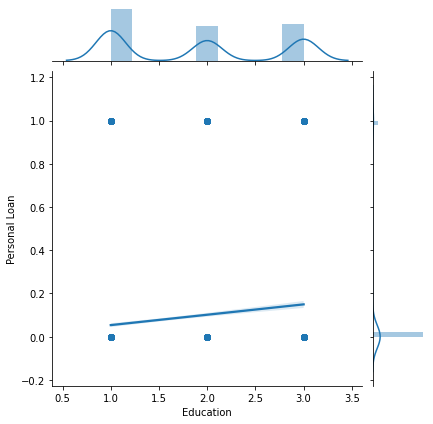

In [109]:
sns.jointplot("Education", "Personal Loan", data=bankDf, kind="reg")

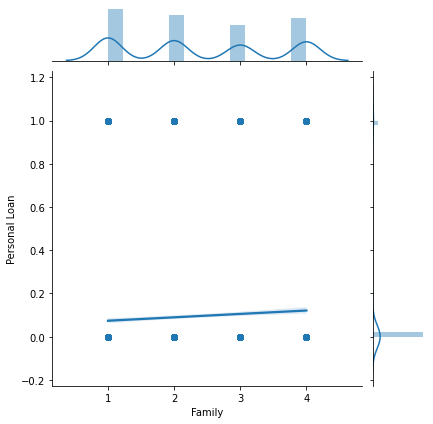

In [110]:
sns.jointplot("Family", "Personal Loan", data=bankDf, kind="reg")

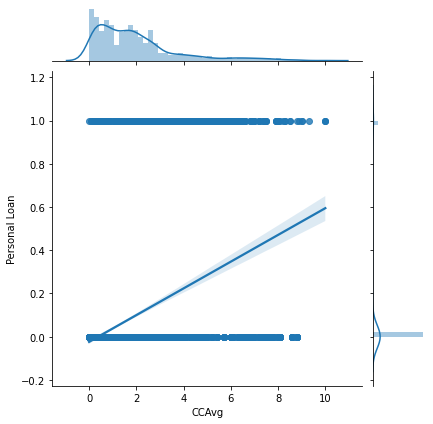

In [111]:
sns.jointplot("CCAvg", "Personal Loan", data=bankDf, kind="reg")

In [125]:
X = bankDf[['Income', 'Education', 'Family', 'CCAvg']] # Predictor feature columns 
Y = bankDf['Personal Loan'] # Predicted class (1=True, 0=False) 

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

,Income,Education,Family,CCAvg
1334,35,1,2,1.3
4768,39,2,1,2.0
65,131,1,1,3.8
177,65,2,4,1.8
4489,21,2,3,0.2


In [126]:
# 4- Use Logistic Regression model to predict whether the customer will take personal loan or not. 

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df) 

          0         1         2         3  intercept
0  0.042123  1.190045  0.488646  0.138458 -10.521239


In [127]:
model_score = model.score(x_test, y_test)
print(model_score)

0.9406666666666667


In [131]:
# 5- Model Score is improved here by removing the columns which were not showing strong correlation 

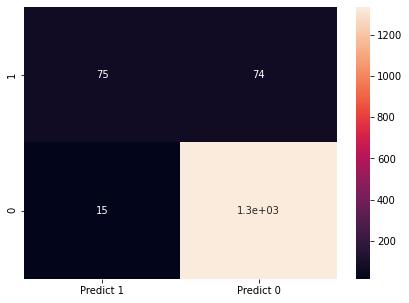

In [129]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [130]:
# 6 - Here we have also increased true positives and true negatives
# Our model shows strong correlation on the person's income, education, family size and credit card spending; its hard to predict since the success rate of getting personal loan is 9.6%; 
# but it can be said that people with income 50k or higer, with higher credit card spending have higher chances of getting a personal loan.